# Chapter 4 - Classification

- [Load dataset](#Load-dataset)
- [The Default data set](#Figure-4.1---Default-data-set)
- [4.3 Logistic Regression](#4.3-Logistic-Regression)


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm


%matplotlib inline
plt.style.use('seaborn-white')

### Load dataset

In [2]:
# In R, I exported the dataset from package 'ISLR' to an Excel file
# df = pd.read_excel('Data/Default.xlsx')
df = pd.read_excel('https://github.com/borisgarbuzov/schulich_data_science_1/blob/master/Data/Default.xlsx?raw=true')

# Note: factorize() returns two objects: a label array and an array with the unique values.
# We are only interested in the first object.
# what is factorize?
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]
df.head(3)

,Unnamed: 0,default,student,balance,income,default2,student2
0,1,No,No,729.526495,44361.625074,0,0
1,2,No,Yes,817.180407,12106.134700,0,1
2,3,No,No,1073.549164,31767.138947,0,0


In [3]:

factorizedLen = len(df.default.factorize())
print("factorizedLen =", factorizedLen)
factorized1 = df.default.factorize()[1]
print("factorized1 =", factorized1)
print("type(df.default.factorize()) =", type(df.default.factorize()))
print("df.default.factorize() =\n", df.default.factorize())
df.default.factorize()[0]




factorizedLen = 2
factorized1 = Index(['No', 'Yes'], dtype='object')
type(df.default.factorize()) = <class 'tuple'>
df.default.factorize() =
 (array([0, 0, 0, ..., 0, 0, 0]), Index(['No', 'Yes'], dtype='object'))


array([0, 0, 0, ..., 0, 0, 0])

In [4]:
df.head(3)


,Unnamed: 0,default,student,balance,income,default2,student2
0,1,No,No,729.526495,44361.625074,0,0
1,2,No,Yes,817.180407,12106.134700,0,1
2,3,No,No,1073.549164,31767.138947,0,0


###  Figure 4.1 - Default data set

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


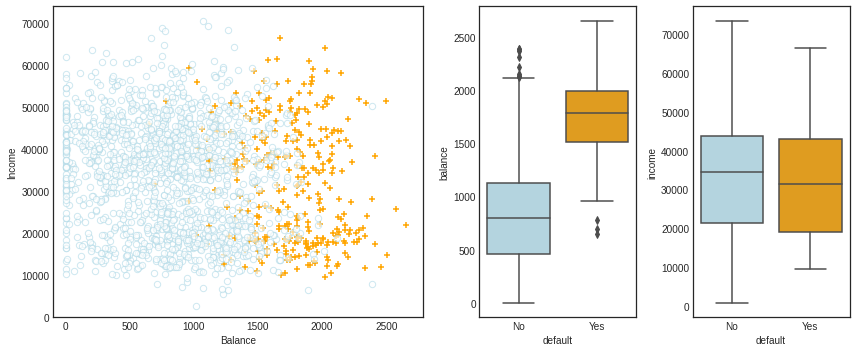

In [5]:
fig = plt.figure(figsize=(12,5))
# diviede the figure splace to 1 line and 4 columns
gs = mpl.gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0,:-2])
ax2 = plt.subplot(gs[0,-2])
ax3 = plt.subplot(gs[0,-1])
# There are less defaults than non-defaults.
# That is why we need 15%? 
# Take a fraction of the samples where target value (default) is 'no'
# Perhaps, because we have more no than yes
df_no = df[df.default2 == 0].sample(frac=0.15)
# Take all samples  where target value is 'yes'
df_yes = df[df.default2 == 1]
df_ = df_no.append(df_yes)

ax1.scatter(df_[df_.default == 'Yes'].balance, df_[df_.default == 'Yes'].income, s=40, c='orange', marker='+',
            linewidths=1)
ax1.scatter(df_[df_.default == 'No'].balance, df_[df_.default == 'No'].income, s=40, marker='o', linewidths='1',
            edgecolors='lightblue', facecolors='white', alpha=.6)

ax1.set_ylim(ymin=0)
ax1.set_ylabel('Income')
ax1.set_xlim(xmin=-100)
ax1.set_xlabel('Balance')

c_palette = {'No':'lightblue', 'Yes':'orange'}
sns.boxplot('default', 'balance', data=df, orient='v', ax=ax2, palette=c_palette)
sns.boxplot('default', 'income', data=df, orient='v', ax=ax3, palette=c_palette)
# Collects all graphs (axes) from the GridSpec
gs.tight_layout(plt.gcf())
# Without the command above, labels may run onto one another. 



## 4.3 Logistic Regression
### Figure 4.2

X_test =
 [[0.000e+00]
 [1.000e+00]
 [2.000e+00]
 ...
 [2.652e+03]
 [2.653e+03]
 [2.654e+03]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


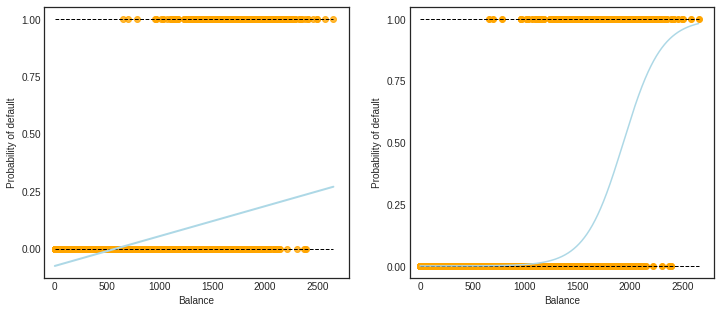

In [7]:
# B: May work both .to_numpy() and .values
# Each element we wrap up into the square brackets
X_train = df.balance.values.reshape(-1,1) 

y = df.default2

# Create array of test data. Calculate the classification probability
# and predicted classification.
X_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)

print("X_test =\n", X_test)

clf = skl_lm.LogisticRegression(solver='newton-cg')
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn-linear-model-logisticregression
# Description of Newton-cg and other solvers
# https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions
clf.fit(X_train,y)
prob = clf.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
# Left plot
sns.regplot(df.balance, df.default2, order=1, ci=None,
            scatter_kws={'color':'orange'},
            line_kws={'color':'lightblue', 'lw':2}, ax=ax1)
# Visually, this line should be steeper. 

# Right plot
ax2.scatter(X_train, y, color='orange')
ax2.plot(X_test, prob[:,1], color='lightblue')

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_ylabel('Probability of default')
    ax.set_xlabel('Balance')
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.])
    ax.set_xlim(xmin=-100, xmax=2800)
    
    

### Table 4.1

In [8]:

y = df.default2

#####  scikit-learn

In [9]:
# Using newton-cg solver, the coefficients are equal/closest to the ones in the book. 
# I do not know the details on the differences between the solvers.
clf = skl_lm.LogisticRegression(solver='newton-cg')
X_train = df.balance.values.reshape(-1,1)
clf.fit(X_train,y)
print(clf)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
classes:  [0 1]
coefficients:  [[0.00549892]]
intercept : [-10.65132973]


##### statsmodels
When we did it by sci-kit learn, we did not need to add a constant. 
Now we need it. 

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
# S
# Our experiments with the code below
X_train = sm.add_constant(df.balance)
# print(dir(smf))
print(y)
print("-----------------------")
print(X_train)

# est = smf.logit(y.ravel(), X_train).fit()
# est.summary2().tables[1]

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: default2, Length: 10000, dtype: int64
-----------------------
      const      balance
0       1.0   729.526495
1       1.0   817.180407
2       1.0  1073.549164
3       1.0   529.250605
4       1.0   785.655883
...     ...          ...
9995    1.0   711.555020
9996    1.0   757.962918
9997    1.0   845.411989
9998    1.0  1569.009053
9999    1.0   200.922183

[10000 rows x 2 columns]


###  Table 4.2

In [12]:
X_train = sm.add_constant(df.student2)
y = df.default2

print(y)
print("----------------")
print(X_train)

print(y.value_counts(1))
print("===================")

# est = smf.logit(y, X_train).fit()
est = sm.Logit(y, X_train).fit()
est.summary2().tables[1]

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: default2, Length: 10000, dtype: int64
----------------
      const  student2
0       1.0         0
1       1.0         1
2       1.0         0
3       1.0         0
4       1.0         0
...     ...       ...
9995    1.0         0
9996    1.0         0
9997    1.0         0
9998    1.0         0
9999    1.0         1

[10000 rows x 2 columns]
0    0.9667
1    0.0333
Name: default2, dtype: float64
Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-3.504128,0.070713,-49.554094,0.000000,-3.642723,-3.365532
student2,0.404887,0.115019,3.520177,0.000431,0.179454,0.630320



###  Table 4.3 - Multiple Logistic Regression

In [13]:
X_train = sm.add_constant(df[['balance', 'income', 'student2']])
est = sm.Logit(y, X_train).fit()
# https://tedboy.github.io/statsmodels_doc/generated/generated/statsmodels.api.Logit.html
# est = smf.logit(y, X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-10.869045,0.492273,-22.079320,4.995499e-108,-11.833882,-9.904209
balance,0.005737,0.000232,24.736506,4.331521e-135,0.005282,0.006191
income,0.000003,0.000008,0.369808,7.115254e-01,-0.000013,0.000019
student2,-0.646776,0.236257,-2.737595,6.189022e-03,-1.109831,-0.183721


In [14]:
X_train.head() 

,const,balance,income,student2
0,1.0,729.526495,44361.625074,0
1,1.0,817.180407,12106.134700,1
2,1.0,1073.549164,31767.138947,0
3,1.0,529.250605,35704.493935,0
4,1.0,785.655883,38463.495879,0


### Figure 4.3 - Confounding

In [15]:
# balance and default vectors for students
X_train = df[df.student == 'Yes'].balance.values.reshape(df[df.student == 'Yes'].balance.size,1) 
y = df[df.student == 'Yes'].default2

# balance and default vectors for non-students
X_train2 = df[df.student == 'No'].balance.values.reshape(df[df.student == 'No'].balance.size,1) 
y2 = df[df.student == 'No'].default2

# Vector with balance values for plotting
X_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)

clf = skl_lm.LogisticRegression(solver='newton-cg')
clf2 = skl_lm.LogisticRegression(solver='newton-cg')

clf.fit(X_train,y)
clf2.fit(X_train2,y2)

prob = clf.predict_proba(X_test)
prob2 = clf2.predict_proba(X_test)
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba

In [16]:
# S 
df.groupby(['student','default']).size()

student  default
No       No         6850
         Yes         206
Yes      No         2817
         Yes         127
dtype: int64

In [17]:
df.groupby(['student','default']).size().unstack('default') # S default=-1

default,No,Yes
student,,
No,6850,206
Yes,2817,127


In [18]:
# S
index = pd.MultiIndex.from_tuples([('one', 'a'), ('one', 'b'),
                                   ('two', 'a'), ('two', 'b')])
s = pd.Series(np.arange(1.0, 5.0), index=index)
s

one  a    1.0
     b    2.0
two  a    3.0
     b    4.0
dtype: float64

In [19]:
# S
s.unstack(level=-1)

,a,b
one,1.0,2.0
two,3.0,4.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


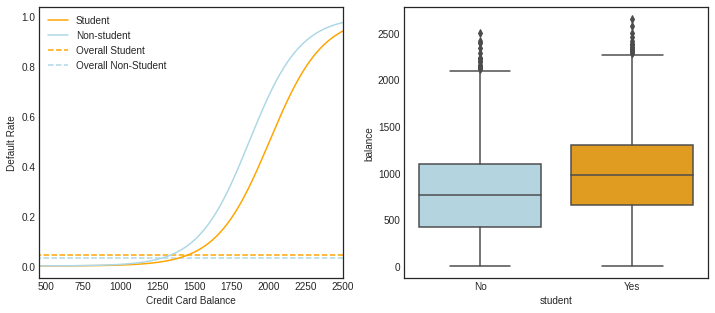

In [20]:
# creating plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))



# Left plot
ax1.plot(X_test, pd.DataFrame(prob)[1], color='orange', label='Student')
ax1.plot(X_test, pd.DataFrame(prob2)[1], color='lightblue', label='Non-student')
ax1.hlines(127/2817, colors='orange', label='Overall Student',
           xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')
ax1.hlines(206/6850, colors='lightblue', label='Overall Non-Student',
           xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')
ax1.set_ylabel('Default Rate')
ax1.set_xlabel('Credit Card Balance')
ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.])
ax1.set_xlim(450,2500)
ax1.legend(loc=2)

# Right plot
sns.boxplot('student', 'balance', data=df, orient='v', ax=ax2,  palette=c_palette);